# MSDS-593: Homework 1 Notebook
#### Tiance Tan
#### Jacek Plonowski

## Data Sources

`cereal.csv` and `usa_mortality_rates.csv` files are being imported from my fork of the `msds593` repository on Github
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
url = 'https://raw.githubusercontent.com/jpnski/msds593/master/homework/hw1/cereal.csv'

cereal_data = pd.read_csv(url)
cereal_data.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [17]:
cereal_data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [18]:
cereal_data.shape

(77, 16)

## Objective
* School will be purchasing a lot of cereal to feed students
* Boss wants to choose a manufacturer and a product
* Wants to prepare presentation for the executive team



In [19]:
cereal_data['name']

0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object

In [20]:
print('There are', len(cereal_data['name'].unique()), 'unique cereals')

There are 77 unique cereals


## Methods of Exploring the Data
- Break dataset into subsets by manufacturer, compare data of each manufacturer
    - To learn about which manufacturer makes higher rated/healthier products, etc. among all the manufacturers available

In [21]:
#selecting a subset of the data where manufacturer=='N' for Nabisco brand
nabisco = cereal_data[cereal_data['mfr']=='N']
nabisco

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993


- For a specific manufacturer, sort their products by their rating to see what are their top products

In [22]:
#top three cereals made by Post manufacturer, as indicated by their 'rating'
nabisco = nabisco.sort_values(by='rating', ascending=False)
nabisco.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.0,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.0,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


- Calculate statistics of the data to quantitatively compare between manufacturers

In [23]:
nabisco_mean_rating = nabisco['rating'].mean()
nabisco_mean_rating

67.96856716666666

In [24]:
manufacturer_list = np.unique(cereal_data['mfr'].values)
manufacturer_list = pd.Series(manufacturer_list)
manufacturer_list

0    A
1    G
2    K
3    N
4    P
5    Q
6    R
dtype: object

In [25]:
#get a series of the mean cereal ratings for all of the 7 manufacturers
mean_ratings = list()

for x in manufacturer_list:
    products = cereal_data[cereal_data['mfr']==x]
    product_mean_rating = products['rating'].mean()
    print(x, '\'s mean rating is', product_mean_rating) #verify mean corresponds to right mfr
    mean_ratings.append(product_mean_rating)

mean_ratings = pd.Series(mean_ratings)

A 's mean rating is 54.850917
G 's mean rating is 34.48585168181818
K 's mean rating is 44.03846234782609
N 's mean rating is 67.96856716666666
P 's mean rating is 41.70574411111111
Q 's mean rating is 42.915989875
R 's mean rating is 41.54299712500001


In [26]:
mfg_ratings = pd.DataFrame({
    'manufacturer': manufacturer_list,
    'mean_rating': mean_ratings
    })

mfg_ratings=mfg_ratings.sort_values(by='mean_rating', ascending=False)
mfg_ratings

,manufacturer,mean_rating
3,N,67.968567
0,A,54.850917
2,K,44.038462
5,Q,42.915990
4,P,41.705744
6,R,41.542997
1,G,34.485852


## Practice Basic Matplotlib

In [27]:
url2 = 'https://raw.githubusercontent.com/jpnski/msds593/master/homework/hw1/usa_mortality_rates.csv'

mortal_data = pd.read_csv(url2)
mortal_data = mortal_data.drop(columns=
                               ['Country Name',
                               'Country Code',
                               'Indicator Name',
                               'Indicator Code'])

mortal_data = mortal_data.iloc[:,:-1] #drop NaN 2019 val
mortal_data

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,30.1,29.5,28.9,28.3,27.7,27.1,26.4,25.7,24.9,24.1,23.2,22.4,21.5,20.6,19.7,18.8,17.9,17.1,16.3,15.6,15,14.4,13.9,13.4,13,12.7,12.4,12.1,11.9,11.6,11.2,10.9,10.5,10.1,9.8,9.5,9.2,8.9,8.7,8.6,8.4,8.3,8.2,8.1,8.1,8,7.9,7.7,7.6,7.5,7.3,7.2,7.1,7,6.9,6.8,6.7,6.6,6.5


In [28]:
#set some global rcparams for plotting
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 7),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

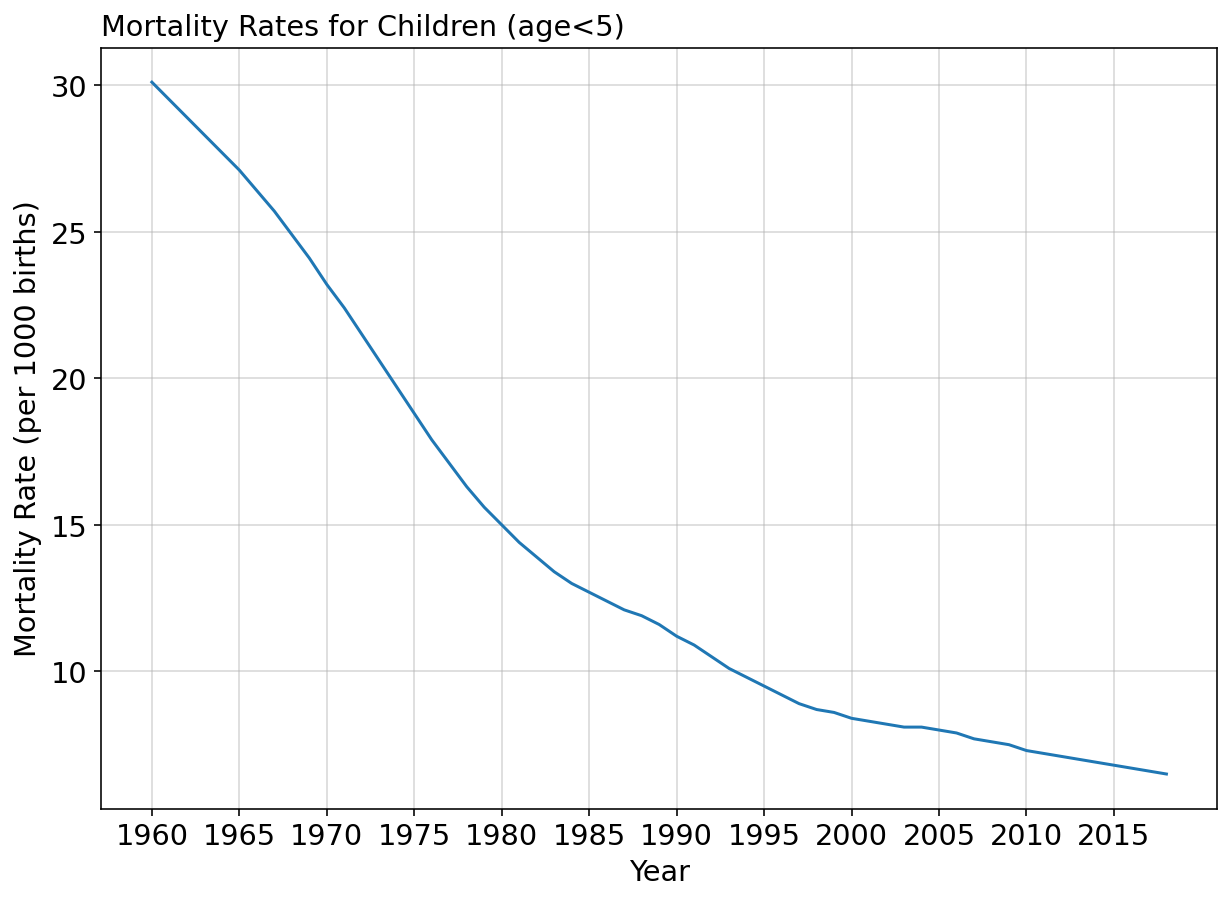

In [29]:
#plot 1/3: line plot of mortality rate vs. years
years = mortal_data.columns
rates = mortal_data.iloc[0]

fig, ax = plt.subplots()

ax.plot(rates)
ax.grid(alpha=0.50)
ax.set_xticks(years[::5])
ax.set_xticklabels(years[::5])

ax.set_xlabel('Year')
ax.set_ylabel('Mortality Rate (per 1000 births)')
ax.set_title('Mortality Rates for Children (age<5)',
             loc='left')

plt.show()

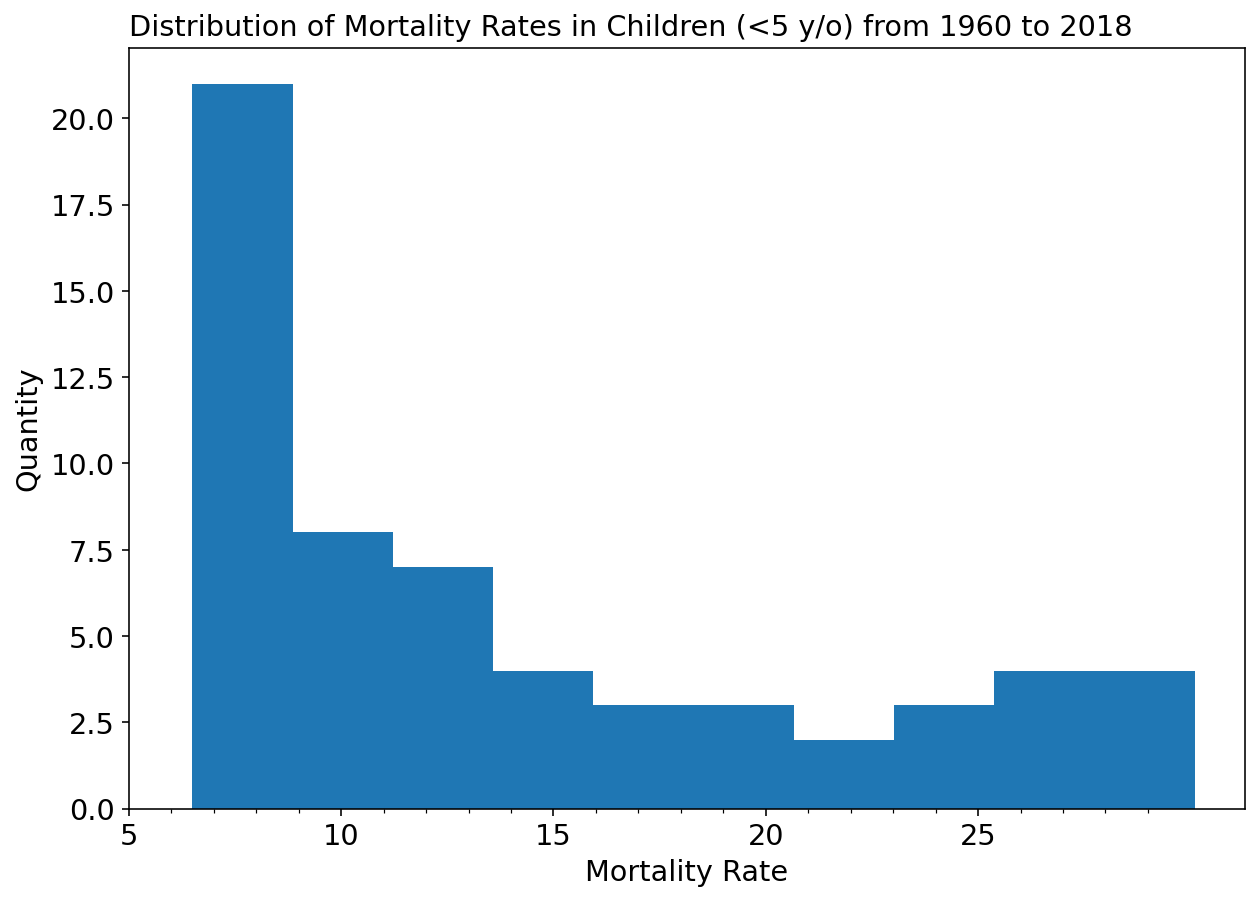

In [30]:
#plot 2/3: histogram of mortality rates from 1960-2018
fig, ax = plt.subplots()

ax.hist(rates, bins=10)

maj_ticks = np.arange(5,30,5)
min_ticks = np.arange(5,30,1)
ax.set_xticks(maj_ticks)
ax.set_xticks(min_ticks, minor=True)

ax.set_xlabel('Mortality Rate')
ax.set_ylabel('Quantity')
ax.set_title('Distribution of Mortality Rates in Children (<5 y/o) from 1960 to 2018',
             loc='left')

plt.show()

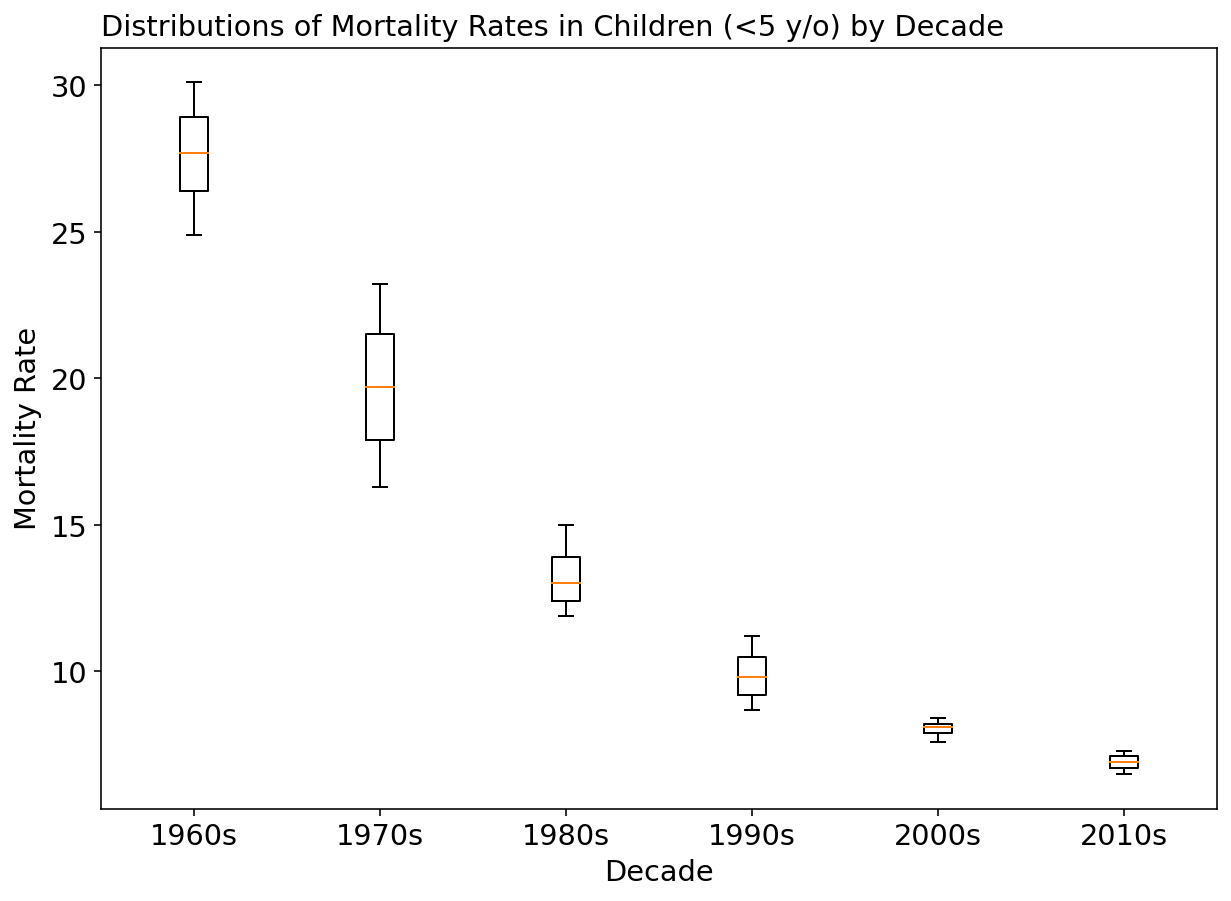

In [31]:
#plot 3/3: Box and whisker plots of mortality rates during each decade
indexes = [0, 10, 20, 30, 40, 50]
labels = (['1960s','1970s','1980s','1990s','2000s','2010s'])

fig, ax = plt.subplots()

decade_list = list()

for x in indexes:
    decade_data = mortal_data.iloc[:, x:x+9]
    decade_list.append(decade_data)

for i in range(len(decade_list)):
    ax.boxplot(decade_list[i], positions = [i]) 

ax.get_xaxis().set_tick_params(direction='out')
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(labels)

ax.set_xlabel('Decade')
ax.set_ylabel('Mortality Rate')
ax.set_title('Distributions of Mortality Rates in Children (<5 y/o) by Decade',
             loc='left')

plt.show()

## Slopegraph

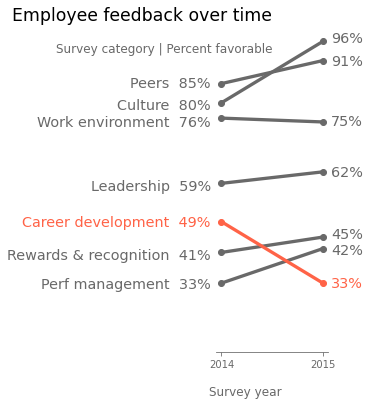

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2,6))
plt.ylim(0.15,1)

ax.set_xticks([2014,2015])
ax.set_yticks([])
ax.tick_params(axis='x', colors='dimgrey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['left'].set_visible(False)

x1, y1 = [2014, 2015], [0.85, 0.91]
x2, y2 = [2014, 2015], [0.80, 0.96]
x3, y3 = [2014, 2015], [0.76, 0.75]
x4, y4 = [2014, 2015], [0.59, 0.62]
x5, y5 = [2014, 2015], [0.49, 0.33]
x6, y6 = [2014, 2015], [0.41, 0.45]
x7, y7 = [2014, 2015], [0.33, 0.42]

plt.plot(x1, y1, x2, y2, x3, y3, x4, y4, x6, y6, x7, y7, 
         marker = 'o', c = 'dimgrey',linewidth = 3.3)
plt.plot(x5, y5, marker = 'o', c = 'tomato',linewidth = 3.3)


ax.text(0.5, 1.06, 'Employee feedback over time',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'xx-large',
        transform=ax.transAxes)

ax.text(0.5, 0.95, 'Survey category | Percent favorable',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(0.58, -0.1, 'Survey year',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(-0.05, 0.845, 'Peers  85%',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'x-large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(-0.05, 0.78, 'Culture  80%',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'x-large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(-0.05, 0.725, 'Work environment  76%',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'x-large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(-0.05, 0.53, 'Leadership  59%',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'x-large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(-0.05, 0.42, 'Career development  49%',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'x-large',
        c = 'tomato',
        transform=ax.transAxes)

ax.text(-0.05, 0.32, 'Rewards & recognition  41%',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'x-large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(-0.05, 0.23, 'Perf management  33%',
        horizontalalignment='right',
        verticalalignment='top',
        fontsize = 'x-large',
        c = 'dimgrey',
        transform=ax.transAxes)

ax.text(1.03, 0.95, '96%', fontsize = 'x-large', c = 'dimgrey', transform=ax.transAxes)
ax.text(1.03, 0.88, '91%', fontsize = 'x-large', c = 'dimgrey', transform=ax.transAxes)
ax.text(1.03, 0.695, '75%', fontsize = 'x-large', c = 'dimgrey', transform=ax.transAxes)
ax.text(1.03, 0.54, '62%', fontsize = 'x-large', c = 'dimgrey', transform=ax.transAxes)
ax.text(1.03, 0.35, '45%', fontsize = 'x-large', c = 'dimgrey', transform=ax.transAxes)
ax.text(1.03, 0.3, '42%', fontsize = 'x-large', c = 'dimgrey', transform=ax.transAxes)
ax.text(1.03, 0.2, '33%', fontsize = 'x-large', c = 'tomato', transform=ax.transAxes)


plt.show()